In [1]:
!pip install -q opendatasets

In [2]:
import opendatasets as od

In [3]:
od.download("https://www.kaggle.com/datasets/ak2033/twitter-multi-class-sentiment-csv")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: afreenhossain
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/ak2033/twitter-multi-class-sentiment-csv


100%|██████████| 581k/581k [00:00<00:00, 374MB/s]

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("/content/twitter-multi-class-sentiment-csv/twitter_multi_class_sentiment.csv")

In [6]:
!pip install -q transformers accelerate datasets bertviz umap-learn seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.5/157.5 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 74.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [7]:
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        16000 non-null  object
 1   label       16000 non-null  int64 
 2   label_name  16000 non-null  object
dtypes: int64(1), object(2)
memory usage: 375.1+ KB


In [9]:
df.isnull().sum()

,0
text,0
label,0
label_name,0


In [10]:
df["label"].value_counts()

,count
label,
1,5362
0,4666
3,2159
4,1937
2,1304
5,572


### data analysis

In [11]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Frequency of label names')

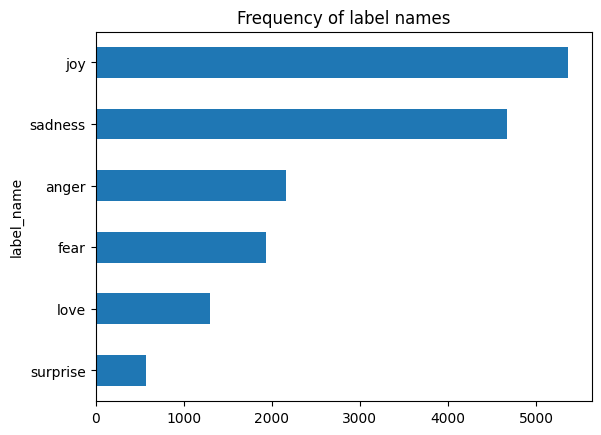

In [12]:
label_counts = df["label_name"].value_counts(ascending=True)

label_counts.plot.barh()
plt.title("Frequency of label names")

<Axes: title={'center': 'Words Per Tweet'}, xlabel='label_name'>

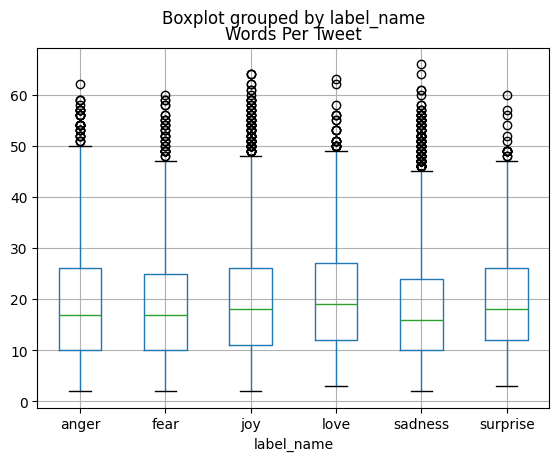

In [13]:
df["Words Per Tweet"] = df["text"].str.split().apply(len)
df.boxplot("Words Per Tweet", by="label_name")

In [14]:
from transformers import AutoTokenizer

In [15]:
model = "google-bert/bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

In [16]:
test_text = "Hello World, how are you today?"

tokenizer.tokenize(test_text)

['hello', 'world', ',', 'how', 'are', 'you', 'today', '?']

In [17]:
tokenizer.decoder

WordPiece(prefix="##", cleanup=True)

In [18]:
tokenizer.encode("Hello World")

[101, 7592, 2088, 102]

In [19]:
tokenizer.decode([101, 7592, 2088, 102])

'[CLS] hello world [SEP]'

In [20]:
len(tokenizer.get_vocab())

30522

In [21]:
tokenizer.convert_ids_to_tokens([101, 7592, 2088, 102])

['[CLS]', 'hello', 'world', '[SEP]']

In [22]:
tokenizer.vocab_size

30522

In [23]:
tokenizer(test_text)

{'input_ids': [101, 7592, 2088, 1010, 2129, 2024, 2017, 2651, 1029, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

- This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided by parameter stratify. <br>
ref.: https://stackoverflow.com/questions/34842405/parameter-stratify-from-method-train-test-split-scikit-learn

### data loader and train, test, split

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
train, test = train_test_split(df, test_size=0.25, stratify=df["label_name"])

In [26]:
df.shape, train.shape, test.shape

((16000, 4), (12000, 4), (4000, 4))

In [29]:
test, validation = train_test_split(test, test_size=0.3, stratify=test["label_name"])

In [30]:
train.shape, test.shape, validation.shape

((12000, 4), (2520, 4), (1080, 4))

In [31]:
train.head()

,text,label,label_name,Words Per Tweet
14963,i feel can be blamed on the music,0,sadness,8
1335,i always feel slightly worthless almost self c...,0,sadness,49
12423,i liked knowing that i am not the only one fee...,2,love,39
5566,i think it is easy to feel afraid when one con...,4,fear,31
10330,i hate feeling pressured into having to carry ...,4,fear,34


In [33]:
test.head()

,text,label,label_name,Words Per Tweet
12879,i feel like im collapsing slowly like a bouncy...,1,joy,14
9700,i always love working with different designers...,1,joy,21
7711,i feel like theres nothing in my life empty,0,sadness,9
2016,im feeling at my creative best rather than tha...,1,joy,18
2263,i do not know how to feel my hearts aching sad...,0,sadness,29


In [34]:
from datasets import Dataset, DatasetDict

In [35]:
Dataset.from_pandas(train)

Dataset({
    features: ['text', 'label', 'label_name', 'Words Per Tweet', '__index_level_0__'],
    num_rows: 12000
})

<h3>1. Why Not Just Keep Pandas DataFrames?</h3>

While pandas is great for data analysis, most **Hugging Face Transformers** training pipelines expect datasets in their own `datasets.Dataset` format. This format:

* Integrates directly with Hugging Face tokenizers, mappers, and loaders.
* Supports **on-the-fly preprocessing** with `.map()`.
* Handles **streaming**, **disk-backed memory mapping**, and dataset sharding for large datasets.
* Allows easy saving and loading with `.save_to_disk()` and `.push_to_hub()`.


<h3>2. Why Use `DatasetDict`?</h3>

A `DatasetDict` is a **container** that stores multiple dataset splits in a single object:

```python
{
    "train": Dataset(...),
    "validation": Dataset(...),
    "test": Dataset(...)
}
```

Benefits:

* **Consistency** – keeps train, validation, and test splits together.
* **Easy access** – `dataset["train"]`, `dataset["validation"]`, etc.
* **Direct compatibility** – works with Hugging Face `Trainer` and evaluation utilities.
* **Avoids mistakes** – prevents mixing up dataset splits.

<h3>3. Why `Dataset.from_pandas()`?</h3>

`Dataset.from_pandas(df)` converts a pandas DataFrame into a Hugging Face `Dataset`.

This is necessary because `train`, `test`, and `validation` are pandas DataFrames, not Hugging Face datasets.

---

You do this because Hugging Face models work best with `DatasetDict` objects containing split `Dataset` objects, and `Dataset.from_pandas()` is the bridge from pandas DataFrames to this efficient, model-ready format.


In [39]:
dataset = DatasetDict({
    "train": Dataset.from_pandas(train, preserve_index=False),
    "test": Dataset.from_pandas(test, preserve_index=False),
    "validation": Dataset.from_pandas(validation, preserve_index=False)
})

In [40]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_name', 'Words Per Tweet'],
        num_rows: 12000
    })
    test: Dataset({
        features: ['text', 'label', 'label_name', 'Words Per Tweet'],
        num_rows: 2520
    })
    validation: Dataset({
        features: ['text', 'label', 'label_name', 'Words Per Tweet'],
        num_rows: 1080
    })
})

In [41]:
def tokenize(batch):
  tokenized = tokenizer(batch["text"], padding=True, truncation=True)
  return tokenized

In [45]:
len(dataset["train"]["text"])

12000

In [46]:
dataset["train"]["text"]

Column(['i feel can be blamed on the music', 'i always feel slightly worthless almost self condemning like i should be doing more amounting more saving the world one day at a time a preacher on a podium a counselor for teen single struggling mom s a writer a motivational speaker a super mom to my baby boy', 'i liked knowing that i am not the only one feeling the way i do about job options the thing that i liked the most was i was able to find some career path and i found some interests', 'i think it is easy to feel afraid when one considers the nuclear weapons the weather the protests the riots the police reactions the governments responses or the laws being passed', 'i hate feeling pressured into having to carry on conversations because if i didnt it would just end up with the two of us breathing at each other until our receivers got all steamy'])

In [47]:
dataset["train"]["text"][0]

'i feel can be blamed on the music'

In [49]:
dataset["train"][1]

{'text': 'i always feel slightly worthless almost self condemning like i should be doing more amounting more saving the world one day at a time a preacher on a podium a counselor for teen single struggling mom s a writer a motivational speaker a super mom to my baby boy',
 'label': 0,
 'label_name': 'sadness',
 'Words Per Tweet': 49}

In [50]:
tokenize(dataset["train"][1])

{'input_ids': [101, 1045, 2467, 2514, 3621, 22692, 2471, 2969, 28525, 2066, 1045, 2323, 2022, 2725, 2062, 3815, 2075, 2062, 7494, 1996, 2088, 2028, 2154, 2012, 1037, 2051, 1037, 14512, 2006, 1037, 14502, 1037, 17220, 2005, 9458, 2309, 8084, 3566, 1055, 1037, 3213, 1037, 14354, 2389, 5882, 1037, 3565, 3566, 2000, 2026, 3336, 2879, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [51]:
tokenize(dataset["train"][:2])

{'input_ids': [[101, 1045, 2514, 2064, 2022, 11248, 2006, 1996, 2189, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2467, 2514, 3621, 22692, 2471, 2969, 28525, 2066, 1045, 2323, 2022, 2725, 2062, 3815, 2075, 2062, 7494, 1996, 2088, 2028, 2154, 2012, 1037, 2051, 1037, 14512, 2006, 1037, 14502, 1037, 17220, 2005, 9458, 2309, 8084, 3566, 1055, 1037, 3213, 1037, 14354, 2389, 5882, 1037, 3565, 3566, 2000, 2026, 3336, 2879, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

<h3>1. `.map()` Behavior </h3>

```python
dataset_encoded = dataset.map(tokenize, batch_size=None, batched=True)
```

* **batched=True** → The function receives batches (dict of lists)
* **batch\_size=None** → All rows of a split are sent in one batch
* For train split: `batch["text"]` is length 12000
* For test split: `batch["text"]` is length 2520
* For validation split: `batch["text"]` is length 1080

<h3> 2. Example Before Tokenization </h3>

```python
{
  'text': 'i feel can be blamed on the music',
  'label': 0,
  'label_name': 'sadness',
  'Words Per Tweet': 8
}
```


<h3> 3. Example After Tokenization </h3>

```python
{
  'text': 'i feel can be blamed on the music',
  'label': 0,
  'label_name': 'sadness',
  'Words Per Tweet': 8,
  'input_ids': [...],
  'token_type_ids': [...],
  'attention_mask': [...]
}
```

**What the new columns mean:**

* **input\_ids**: Token IDs from the tokenizer's vocabulary
* **token\_type\_ids**: (For models like BERT) Segment IDs to differentiate sentence pairs (all zeros here since it's single sentence)
* **attention\_mask**: `1` for real tokens, `0` for padding tokens

These extra fields are what Transformer models expect as inputs during training/inference.

In [52]:
dataset_encoded = dataset.map(tokenize, batch_size=None, batched=True)

Map:   0%|          | 0/12000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2520 [00:00<?, ? examples/s]

Map:   0%|          | 0/1080 [00:00<?, ? examples/s]

In [54]:
dataset_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_name', 'Words Per Tweet', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 12000
    })
    test: Dataset({
        features: ['text', 'label', 'label_name', 'Words Per Tweet', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 2520
    })
    validation: Dataset({
        features: ['text', 'label', 'label_name', 'Words Per Tweet', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1080
    })
})

In [58]:
dataset_encoded["train"][0]

{'text': 'i feel can be blamed on the music',
 'label': 0,
 'label_name': 'sadness',
 'Words Per Tweet': 8,
 'input_ids': [101,
  1045,
  2514,
  2064,
  2022,
  11248,
  2006,
  1996,
  2189,
  102,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'token_type_ids': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 

In [59]:
label2id = {x["label_name"]: x["label"] for x in dataset["train"]}

In [60]:
label2id

{'sadness': 0, 'love': 2, 'fear': 4, 'anger': 3, 'surprise': 5, 'joy': 1}

In [62]:
for k, v in label2id.items():
  print(k, v)

sadness 0
love 2
fear 4
anger 3
surprise 5
joy 1


In [63]:
id2label = {v: k for k, v in label2id.items()}

In [64]:
id2label

{0: 'sadness', 2: 'love', 4: 'fear', 3: 'anger', 5: 'surprise', 1: 'joy'}

In [65]:
from transformers import AutoModel
import torch

In [66]:
model = AutoModel.from_pretrained(model)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [67]:
model

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [68]:
model.config

BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "torch_dtype": "float32",
  "transformers_version": "4.55.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

### loading model for classification with classifier head

In [69]:
from transformers import AutoModelForSequenceClassification, AutoConfig

In [70]:
num_labels = len(label2id)

In [71]:
num_labels

6

In [72]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [73]:
device

device(type='cuda')

In [75]:
model

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [77]:
config = AutoConfig.from_pretrained(pretrained_model_name_or_path="google-bert/bert-base-uncased", label2id=label2id, id2label=id2label)

In [79]:
config

BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "sadness",
    "1": "joy",
    "2": "love",
    "3": "anger",
    "4": "fear",
    "5": "surprise"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "anger": 3,
    "fear": 4,
    "joy": 1,
    "love": 2,
    "sadness": 0,
    "surprise": 5
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.55.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

In [80]:
model = AutoModelForSequenceClassification.from_pretrained("google-bert/bert-base-uncased", config=config).to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [81]:
model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

### training

In [82]:
from transformers import TrainingArguments

In [83]:
model.device

device(type='cuda', index=0)

In [85]:
batch_size = 64

training_dir = "bert_base_training_dir"

In [88]:
TrainingArguments(
  output_dir=training_dir,
  overwrite_output_dir=True,
  num_train_epochs=5,
  learning_rate=1e-5,
  per_device_train_batch_size=batch_size,
  per_device_eval_batch_size=batch_size,
  weight_decay=0.01,
  disable_tqdm=False
)

TrainingArguments(
_n_gpu=1,
accelerator_config={'split_batches': False, 'dispatch_batches': None, 'even_batches': True, 'use_seedable_sampler': True, 'non_blocking': False, 'gradient_accumulation_kwargs': None, 'use_configured_state': False},
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
average_tokens_across_devices=False,
batch_eval_metrics=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_persistent_workers=False,
dataloader_pin_memory=True,
dataloader_prefetch_factor=None,
ddp_backend=None,
ddp_broadcast_buffers=None,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
do_eval=False,
do_predict=False,
do_train=False,
eval_accumulation_steps=None,
eval_delay=0,
eval_do_concat_batches=True,
eval_on_start=False,
eval_steps=None,
eval_strategy=IntervalStrategy.NO,
eval_use_gather_object=False,


In [90]:
import numpy as np

In [91]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 1.6 MB/s eta 0:00:00


In [92]:
import evaluate

In [93]:
accuracy = evaluate.load("accuracy")

In [94]:
def compute_metrics(eval_predictions):
  predictions, labels = eval_predictions
  predictions = np.argmax(predictions, axis=1)
  return accuracy.compute(predictions=predictions, references=labels)

In [95]:
from sklearn.metrics import accuracy_score, f1_score

In [96]:
def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  f1 = f1_score(labels, preds, average="weighted")
  acc = accuracy_score(labels, preds)

  return {"F1 Score": f1, "Accuracy": acc}

In [97]:
from transformers import Trainer

In [102]:
trainer = Trainer(model=model, compute_metrics=compute_metrics, train_dataset=dataset_encoded["train"], eval_dataset=dataset_encoded["validation"], tokenizer=tokenizer)

/tmp/ipython-input-4096204698.py:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model, compute_metrics=compute_metrics, train_dataset=dataset_encoded["train"], eval_dataset=dataset_encoded["validation"], tokenizer=tokenizer)


In [103]:
trainer = Trainer(model=model, compute_metrics=compute_metrics, train_dataset=dataset_encoded["train"], eval_dataset=dataset_encoded["validation"], processing_class=tokenizer)

In [104]:
tokenizer

BertTokenizerFast(name_or_path='google-bert/bert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=False, added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}
)

In [105]:
trainer.train()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: term101112 (term101112-n-a) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss
500,0.781600
1000,0.335500
1500,0.283100
2000,0.180300
2500,0.169100
3000,0.159300
3500,0.099900
4000,0.105800
4500,0.087000


TrainOutput(global_step=4500, training_loss=0.24462886386447483, metrics={'train_runtime': 1115.5203, 'train_samples_per_second': 32.272, 'train_steps_per_second': 4.034, 'total_flos': 1609557463152000.0, 'train_loss': 0.24462886386447483, 'epoch': 3.0})

### model evaluation and prediction

In [106]:
preds_output = trainer.predict(dataset_encoded["test"])

In [107]:
preds_output

PredictionOutput(predictions=array([[-1.8972855 ,  8.572921  , -0.7582321 , -1.301439  , -1.9865981 ,
        -1.6952045 ],
       [-2.0419445 ,  8.571592  , -0.6935817 , -1.33938   , -1.9375379 ,
        -1.6433747 ],
       [ 8.350327  , -1.9414139 , -2.2099142 , -0.8786467 , -2.0082655 ,
        -1.8499839 ],
       ...,
       [ 8.211646  , -1.7654299 , -2.639114  , -0.49926603, -1.6714443 ,
        -1.9885179 ],
       [ 8.345844  , -2.2220542 , -1.8335177 , -1.0348934 , -1.9033157 ,
        -1.9449134 ],
       [ 8.35534   , -2.1796696 , -1.9600292 , -0.9238506 , -1.8954229 ,
        -1.9526536 ]], dtype=float32), label_ids=array([1, 1, 0, ..., 0, 0, 0]), metrics={'test_loss': 0.22549480199813843, 'test_F1 Score': 0.9352182342705054, 'test_Accuracy': 0.9349206349206349, 'test_runtime': 14.9033, 'test_samples_per_second': 169.09, 'test_steps_per_second': 21.136})

In [108]:
preds_output.metrics

{'test_loss': 0.22549480199813843,
 'test_F1 Score': 0.9352182342705054,
 'test_Accuracy': 0.9349206349206349,
 'test_runtime': 14.9033,
 'test_samples_per_second': 169.09,
 'test_steps_per_second': 21.136}

The selected code np.argmax(preds_output.predictions) finds the index of the maximum value along the flattened array of predictions from the model. In this context, preds_output.predictions is likely a multi-dimensional array where each row represents the predicted scores for each class for a given input. Without specifying an axis, np.argmax flattens the array and returns the index of the single largest value across all predictions. This is generally not what you want for classification, as you typically want the predicted class (the index with the highest score) for each prediction. The next cell np.argmax(preds_output.predictions, axis=1) correctly finds the index of the maximum value along axis 1 (across the class scores for each prediction), which gives the predicted class for each input.

In [109]:
np.argmax(preds_output.predictions)

np.int64(14341)

In [110]:
np.argmax(preds_output.predictions, axis=1)

array([1, 1, 0, ..., 0, 0, 0])

In [114]:
dataset_encoded["test"][:]["text"][:5]

['i feel like im collapsing slowly like a bouncy castle with a small tear',
 'i always love working with different designers for the first time especially when i feel they are talented innovative and fun',
 'i feel like theres nothing in my life empty',
 'im feeling at my creative best rather than that of a student who has a deadline to meet',
 'i do not know how to feel my hearts aching sadness over the loss of those good and kind people and all the other connected losses a href http']

In [115]:
dataset_encoded["test"][:]["label"][:5]

[1, 1, 0, 1, 0]

In [116]:
y_preds = np.argmax(preds_output.predictions, axis=1)
y_true = dataset_encoded["test"][:]["label"]

In [117]:
from sklearn.metrics import classification_report

In [119]:
print(classification_report(y_true, y_preds))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       734
           1       0.96      0.93      0.94       845
           2       0.79      0.87      0.83       205
           3       0.95      0.93      0.94       340
           4       0.91      0.91      0.91       305
           5       0.81      0.78      0.79        91

    accuracy                           0.93      2520
   macro avg       0.90      0.90      0.90      2520
weighted avg       0.94      0.93      0.94      2520



In [120]:
from sklearn.metrics import confusion_matrix

In [121]:
import seaborn as sns

In [122]:
cm = confusion_matrix(y_true, y_preds)

In [123]:
cm

array([[726,   2,   0,   4,   2,   0],
       [  3, 785,  45,   2,   1,   9],
       [  1,  24, 179,   0,   0,   1],
       [  8,   4,   2, 317,   9,   0],
       [  9,   1,   0,  10, 278,   7],
       [  0,   3,   0,   0,  17,  71]])

Text(0.5, 25.722222222222214, 'Predicted Values')

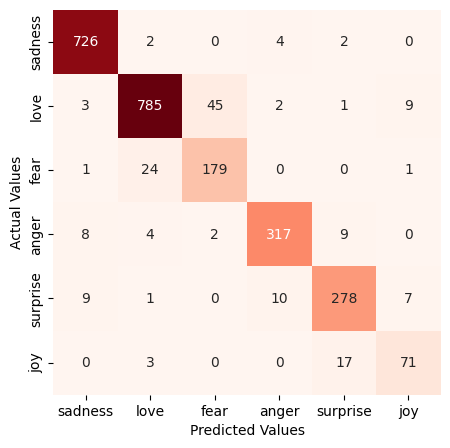

In [127]:
plt.figure(figsize=(5, 5,))
sns.heatmap(cm, annot=True, xticklabels=label2id.keys(), yticklabels=label2id.keys(), fmt="d", cbar=False, cmap="Reds")
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

In [128]:
text = "My day did not go well today."
input_encoded = tokenizer(text, return_tensors="pt").to(device)

In [129]:
input_encoded

{'input_ids': tensor([[ 101, 2026, 2154, 2106, 2025, 2175, 2092, 2651, 1012,  102]],
       device='cuda:0'), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], device='cuda:0')}

In [130]:
with torch.no_grad():
  output = model(**input_encoded)

In [131]:
output

SequenceClassifierOutput(loss=None, logits=tensor([[-1.4819,  8.0426, -0.3817, -1.0884, -1.9590, -1.9839]],
       device='cuda:0'), hidden_states=None, attentions=None)

In [132]:
logits = output.logits

In [133]:
logits

tensor([[-1.4819,  8.0426, -0.3817, -1.0884, -1.9590, -1.9839]],
       device='cuda:0')

In [134]:
torch.argmax(logits, dim=-1)

tensor([1], device='cuda:0')

In [136]:
torch.argmax(logits, dim=1)

tensor([1], device='cuda:0')

In [137]:
pred = torch.argmax(logits, dim=-1).item()

In [138]:
pred

1

In [139]:
id2label[pred]

'joy'

In [140]:
text = "Today seems like a great day. Hope it goes well!"

def get_prediction(text):
  input_encoded = tokenizer(text, return_tensors="pt").to(device)
  with torch.no_grad():
    outputs = model(**input_encoded)

  logits = outputs.logits

  pred = torch.argmax(logits, dim=-1).item()

  return id2label[pred]

In [141]:
get_prediction(text)

'joy'

In [142]:
get_prediction("Not doing well today")

'joy'

In [143]:
get_prediction("I'm sad")

'sadness'

In [144]:
id2label

{0: 'sadness', 2: 'love', 4: 'fear', 3: 'anger', 5: 'surprise', 1: 'joy'}

In [145]:
get_prediction("You ARE A BAD PERSON!")

'anger'

In [146]:
get_prediction("You are a bad person")

'anger'

In [147]:
get_prediction("You are bad")

'sadness'

In [149]:
get_prediction("I want to laugh but can't cause I'm in pain")

'anger'

In [150]:
get_prediction("I'm astonished!")

'surprise'

In [151]:
get_prediction("How could you let this happen?!")

'anger'

In [152]:
get_prediction("Whoa!")

'anger'

In [155]:
get_prediction("Whoa! The game was awesome!!")

'joy'

In [156]:
get_prediction("I'm so stoked!")

'joy'

In [157]:
trainer.save_model("bert-uncased-twitter-multiclass-sentiment-analysis-model")

### load in pipeline and test

In [164]:
from transformers import pipeline

In [165]:
pipe = pipeline("text-classification", model="bert-uncased-twitter-multiclass-sentiment-analysis-model")

Device set to use cuda:0


In [166]:
text = "You are bad"

pipe(text)

[{'label': 'sadness', 'score': 0.9724872708320618}]

In [167]:
text = "I'm happy"

pipe(text)

[{'label': 'joy', 'score': 0.9997273087501526}]

In [168]:
text = "I'm sad"

pipe(text)

[{'label': 'sadness', 'score': 0.9997480511665344}]

In [169]:
text = "I'm alright!"

pipe(text)

[{'label': 'joy', 'score': 0.9996727705001831}]

In [172]:
text = "I'm astonished!"

pipe(text)

[{'label': 'surprise', 'score': 0.9985604882240295}]

In [173]:
text = "I'm feeling weak!"

pipe(text)

[{'label': 'sadness', 'score': 0.9581851363182068}]

In [174]:
text = "I'm falling in love with you"

pipe(text)

[{'label': 'love', 'score': 0.9709120392799377}]

In [175]:
text = "I'm falling for you"

pipe(text)

[{'label': 'love', 'score': 0.980707585811615}]

In [177]:
id2label

{0: 'sadness', 2: 'love', 4: 'fear', 3: 'anger', 5: 'surprise', 1: 'joy'}

In [178]:
pipe("i didnt feel humiliated")

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


[{'label': 'sadness', 'score': 0.9997543692588806}]

In [179]:
pipe("i am feeling grouchy")

[{'label': 'anger', 'score': 0.9996241331100464}]

In [180]:
pipe("i only have a couple of things left to make and at the start of december i am done and feeling smug")

[{'label': 'joy', 'score': 0.9997544884681702}]

In [182]:
pipe("i only have a couple of things left to make and at the start of december i am done and feeling smug")

[{'label': 'joy', 'score': 0.9997544884681702}]